## Startup Exploration



Investment in Startups is a speculative and intuitive venture in which investors are willing to put their money in an idea that has not been proved but shows potential to make more money. From the different kinds of investors, there are those that do not have a direct exit strategy and those that have.

It is from this view that then investors protect themselves leading to such events like ipos, closure, acquisition and continous operation as a company. Therefore being a speculative venture, closure is the most expensive events for investors as their is a high likelihood of them loosing their money.


With this background this notebook, seeks to learn the characteristics of the ipo, closure, acquisition and still operating events, predict if a company would undergo one of the events and finally try to recommend startups for consideration as part of the investment portfolio.

#### Setting up the s3 environment for this notebook

In [1]:
# import sagemaker
# import boto3
# from sagemaker.amazon.amazon_estimator import get_image_uri
# from sagemaker.session import s3_input, Session

In [2]:
# bucket_name = 'startup-recommender-app'
# my_region = boto3.session.Session().region_name

In [3]:
# s3 = boto3.client('s3')
# existing_buckets = [x['Name'] for x in s3.list_buckets()['Buckets']]

# try:
    # if bucket_name not in existing_buckets:
       # if my_region is None:
           # s3.create_bucket(Bucket=bucket_name)
          #  print('s3 bucket created successfully')
        #else:
           # location = {'LocationConstraint': my_region}
           # s3.create_bucket(Bucket=bucket_name, CreateBucketConfiguration=location)
    #else:
      #  print('Already exists')
#except Exception as e:
   # print('s3 error: ', e)

In [4]:
# Setting up the path for model saving
#prefix = 'models-as-built-in-algo'
#output_path = 's3://{}/{}/output'.format(bucket_name, prefix)
#print(output_path)

In [2]:
#Importing necessary packages to read files
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv('../input/startup-investments/objects.csv', low_memory=False)

In [15]:
df5.shape

(196553, 40)

In [6]:
# Parse the columns raising the warning above correctly
list = df1.columns.to_list()
list_2 = [3,7,9,10,17,18,21,22,23,25,26,29,30,33,34,37]
for i in list_2:
    print(list[i], i)

parent_id 3
category_code 7
founded_at 9
closed_at 10
short_description 17
description 18
country_code 21
state_code 22
city 23
first_investment_at 25
last_investment_at 26
first_funding_at 29
last_funding_at 30
first_milestone_at 33
last_milestone_at 34
created_by 37


In [7]:
#Objects Data
df1 = pd.read_csv('../input/startup-investments/objects.csv', dtype={'parent_id':'object', 'category_code': 'object', 'short_description': 'object', 'description': 'object', 'country_code': 'object', 'state_code': 'object', 'city': 'object', 'created_by': 'object'}, parse_dates=[9, 10, 25, 26, 29, 30, 33, 34])

In [8]:
df1.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaT,...,NaT,0,0.0,NaT,NaT,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaT,...,NaT,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaT,0,0.0,NaT,NaT,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaT,0,0.0,NaT,NaT,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [9]:
#Funding Rounds Data
df2 = pd.read_csv('../input/startup-investments/funding_rounds.csv', parse_dates=[3])

In [10]:
#IPOs Data
df3 = pd.read_csv('../input/startup-investments/ipos.csv', parse_dates=[7])
df3.head()

,id,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url,source_description,created_at,updated_at
0,1,1,c:1654,0.000000e+00,USD,0.0,USD,1980-12-19,NASDAQ:AAPL,NaN,NaN,2008-02-09 05:17:45,2012-04-12 04:02:59
1,2,2,c:1242,0.000000e+00,USD,0.0,NaN,1986-03-13,NASDAQ:MSFT,NaN,NaN,2008-02-09 05:25:18,2010-12-11 12:39:46
2,3,3,c:342,0.000000e+00,USD,0.0,NaN,1969-06-09,NYSE:DIS,NaN,NaN,2008-02-09 05:40:32,2010-12-23 08:58:16
3,4,4,c:59,0.000000e+00,USD,0.0,NaN,2004-08-25,NASDAQ:GOOG,NaN,NaN,2008-02-10 22:51:24,2011-08-01 20:47:08
4,5,5,c:317,1.000000e+11,USD,0.0,NaN,1997-05-01,NASDAQ:AMZN,NaN,NaN,2008-02-10 23:28:09,2011-08-01 21:11:22


In [11]:
df1['entity_type'].unique()

array(['Company', 'FinancialOrg', 'Person', 'Product'], dtype=object)

**Observation**

The objects.csv has companies, financial organization, persons, and products data.

In [12]:
df5 = df1[df1['entity_type'] == 'Company']

**_Observaions_**

By means of intution, relevant features are selected and irrevelant features are ignored to form a new Dataframe.

In [13]:
# Creation of df6
df6 = df5[['id','status','normalized_name', 'category_code', 'founded_at', 'closed_at', 'tag_list', 'country_code', 'investment_rounds', 'invested_companies', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships']].copy()

In [14]:
# Looking into the contents of the tag_list feature to check its relevance to the study of this notebook
df5[['tag_list']][~(df5['tag_list'].isna())]

,tag_list
0,"wiki, seattle, elowitz, media-industry, media-..."
1,"flektor, photo, video"
2,"virtualworld, there, teens"
3,"social-network, new, website, web, friends, ch..."
4,"watch, full-length, moives, online, for, free,..."
...,...
196547,"techcrunch50, tc50, collective-intelligence, i..."
196548,"ecommerce, quickbooks-sync, intuit-gold-partne..."
196549,"restaurant-industry-social-network, restaurat-..."
196551,"resumes, resume-database, resume-search, recru..."


In [16]:
df6.shape

(196553, 18)

In [17]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 196552
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  196553 non-null  object        
 1   status              196553 non-null  object        
 2   normalized_name     196549 non-null  object        
 3   category_code       123186 non-null  object        
 4   founded_at          91227 non-null   datetime64[ns]
 5   closed_at           2620 non-null    datetime64[ns]
 6   tag_list            81452 non-null   object        
 7   country_code        87990 non-null   object        
 8   investment_rounds   196553 non-null  int64         
 9   invested_companies  196553 non-null  int64         
 10  first_funding_at    31507 non-null   datetime64[ns]
 11  last_funding_at     31507 non-null   datetime64[ns]
 12  funding_rounds      196553 non-null  int64         
 13  funding_total_usd   196553 no

## Feature Engineering

From the selected features this notebook will strive to feature engineer at this point to help fill in some null values.

1. **Age**

In [18]:
# Base year for operating, acquired and ipo kind of companies
BASE_YEAR = df6.closed_at.max()

In [19]:
from datetime import timedelta

days_yr = timedelta(days=365.25)
days_yr

datetime.timedelta(days=365, seconds=21600)

In [20]:
%%time
# Creating the feature age for the companies
age = []

for i in range(df6.shape[0]):
    if (df6.status.iloc[i] == 'operating') or (df6.status.iloc[i] == 'acquired') or (df6.status.iloc[i] == 'ipo'):
        age.append((BASE_YEAR - df6.founded_at.iloc[i])/days_yr)
    else:
        age.append((df6.closed_at.iloc[i] - df6.founded_at.iloc[i])/days_yr)

CPU times: user 7.44 s, sys: 87.4 ms, total: 7.53 s
Wall time: 7.65 s


In [21]:
df6.loc[:, 'age'] = age

In [22]:
df6[df6.age < 0]

,id,status,normalized_name,category_code,founded_at,closed_at,tag_list,country_code,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,age
936,c:104846,closed,peers,web,2011-09-01,2011-01-01,"social, social-networking, mobile, apps, conta...",NaN,0,0,NaT,NaT,0,0.0,NaT,NaT,0,0,-0.665298
3624,c:125,closed,zooomr,web,2006-03-01,2006-01-01,"photos, sharing, international, zooomr",USA,0,0,2006-02-01,2006-02-01,1,50000.0,NaT,NaT,0,2,-0.161533
7037,c:140734,closed,bluebox now,games_video,2011-08-08,2011-01-01,"bluebox, reward, rewards, casual-games, loyalt...",USA,0,0,2011-11-01,2011-11-01,1,0.0,2011-06-12,2011-06-12,1,2,-0.599589
10819,c:145783,closed,wiredoo,search,2012-12-01,2012-01-01,NaN,NaN,0,0,NaT,NaT,0,0.0,2011-01-01,2011-10-01,2,1,-0.917180
15888,c:152681,closed,pick a student,consulting,2011-06-30,2011-06-01,"crowdsourcing, crowdsolving, student, business...",NaN,0,0,2011-06-14,2011-06-14,1,40000.0,NaT,NaT,0,0,-0.079398
18755,c:156467,closed,fifth reserve,ecommerce,2012-04-01,2012-01-01,"jewelry, jewellery, ecommerce",NaN,0,0,NaT,NaT,0,0.0,NaT,NaT,0,0,-0.249144
22585,c:161102,closed,peoples software company,web,2008-05-01,2008-01-01,"techstars, techstars-boulder-2008",USA,0,0,2008-05-01,2008-05-01,1,0.0,2008-05-01,2008-05-01,1,2,-0.331280
27535,c:167318,closed,poosh all,mobile,2012-05-01,2012-01-01,"iphone, social-networking, android, mobile",NaN,0,0,NaT,NaT,0,0.0,2012-05-01,2012-05-01,1,0,-0.331280
29421,c:169662,closed,roundcourt,web,2012-02-01,2012-01-01,"social-activities, social-discovery",USA,0,0,NaT,NaT,0,0.0,2012-02-01,2012-02-01,1,1,-0.084873
37570,c:17856,closed,healthlok,web,2008-10-01,2008-01-01,"health-care, web-health, health, healthcare, o...",USA,0,0,2006-01-01,2008-01-01,2,0.0,2008-11-01,2008-11-01,1,2,-0.750171


2. **Category**

In [23]:
df6.category_code.unique(), len(df6.category_code.unique())

(array(['web', 'games_video', 'network_hosting', 'advertising',
        'cleantech', nan, 'enterprise', 'other', 'consulting', 'mobile',
        'health', 'software', 'analytics', 'finance', 'education',
        'medical', 'manufacturing', 'biotech', 'ecommerce',
        'public_relations', 'hardware', 'search', 'news', 'government',
        'security', 'photo_video', 'travel', 'semiconductor', 'social',
        'legal', 'transportation', 'hospitality', 'sports', 'nonprofit',
        'fashion', 'messaging', 'music', 'automotive', 'design',
        'real_estate', 'local', 'nanotech', 'pets'], dtype=object), 43)

In [24]:
# Creating a new feature to generalize the category code

leisure = ['games_video', 'photo_video', 'social', 'hospitality', 'sports', 'fashion', 'messaging', 'music']
bizsupport = ['network_hosting', 'advertising', 'enterprise', 'consulting', 'analytics', 'public_relations', 'security', 'legal']
building = ['cleantech', 'manufacturing', 'semiconductor', 'automotive', 'real_eastate', 'nanotech']
petcare = ['pets']
travel = ['travel', 'transportation']
health = ['health', 'medical', 'biotech']
other = ['web', 'other', 'mobile', 'software', 'finance', 'education', 'ecommerce', 'search', 'hardware', 'news', 'government', 'nonprofit', 'local',]

In [25]:
new_catg = []

for i in range(df6.category_code.shape[0]):
    x = df6.category_code.iloc[i]
    if x in leisure:
        new_catg.append('LE')
    elif x in bizsupport:
        new_catg.append('BZ')
    elif x in building:
        new_catg.append('BU')
    elif x in petcare:
        new_catg.append('PC')
    elif x in travel:
        new_catg.append('TR')
    elif x in health:
        new_catg.append('HE')
    else:
        new_catg.append('OT')


In [26]:
df6.loc[:,"category"] = new_catg

3. **Continent**

In [27]:
# Looking into the number and unique values in the country_code feature
df6.country_code.sort_values().unique(), len(df6.country_code.unique())

(array(['AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ANT', 'ARA', 'ARE', 'ARG',
        'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BGD',
        'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA',
        'BRB', 'BRN', 'BWA', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR',
        'COL', 'CRI', 'CSS', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DMA',
        'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'ETH', 'FIN',
        'FRA', 'FST', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GLP', 'GRC',
        'GRD', 'GTM', 'HKG', 'HMI', 'HND', 'HRV', 'HTI', 'HUN', 'IDN',
        'IND', 'IOT', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
        'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LAO',
        'LBN', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR',
        'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD', 'MLT', 'MMR', 'MTQ',
        'MUS', 'MYS', 'NAM', 'NCL', 'NER', 'NFK', 'NGA', 'NIC', 'NLD',
        'NOR', 'NPL', 'NRU', 'NZL', 'OMN', 'PAK', 'PAN', 'PCN', 'PER',
      

In [28]:
# Creating a new feature to generalize the country_code

Africa = ['AGO', 'BDI', 'BEN', 'BWA', 'CIV', 'CMR', 'DZA', 'EGY', 'ETH', 'GHA', 'GIN', 'KEN', 'LSO', 'MAR', 'MDG', 'MUS', 'NAM', 'NER','NGA', 'REU','RWA', 'SDN','SEN', 'SLE', 'SOM','SWZ', 'SYC', 'TUN', 'TZA', 'UGA', 'ZAF', 'ZMB', 'ZWE']
Asia = ['AFG', 'ARE', 'BGD', 'BHR', 'BRN', 'CHN', 'HKG', 'IDN', 'IND', 'IOT', 'IRN', 'IRQ', 'ISR','JOR', 'JPN', 'KAZ', 'KGZ', 'KHM', 'KOR', 'KWT','LAO', 'LBN', 'LKA', 'MAC', 'MDV', 'MMR', 'MYS', 'NPL', 'OMN', 'PAK', 'PCN','PHL','PRK','PST', 'QAT', 'SAU', 'SGP','SYR', 'THA', 'TJK', 'TWN', 'UZB', 'VNM', 'YEM']
Europe = ['AIA', 'ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BEL', 'BGR','BIH', 'BLR', 'CHE', 'CYP', 'CZE', 'DEU', 'DNK','ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GEO', 'GIB', 'GLB', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ITA', 'LIE', 'LTU','LUX', 'LVA', 'MCO', 'MDA', 'MKD', 'MLT', 'NLD', 'NOR', 'POL', 'PRT', 'ROM', 'RUS', 'SMR', 'SVK', 'SVN','SWE', 'TUR', 'UKR']
North_America = ['ATG', 'BHS','BLZ', 'BMU', 'BRB', 'CAN', 'CRI','CUB','CYM', 'DMA', 'GRD', 'GTM', 'HND', 'HTI', 'JAM', 'MEX', 'MTQ', 'PAN', 'PRI', 'SLV', 'UMI','USA', 'VGB', 'VIR']
South_America = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'DOM', 'ECU', 'NIC', 'PER', 'PRY', 'SUR', 'TTO', 'URY','VEN', 'VCT']
Other = ['ANT', 'ARA', 'AUS', 'CSS', 'FST', 'HMI','NCL', 'NFK','NRU', 'NZL']


In [29]:
continent = []

for i in range(df6.country_code.shape[0]):
    x = df6.country_code.iloc[i]
    if x in Africa:
        continent.append('AF')
    elif x in Asia:
        continent.append('AS')
    elif x in Europe:
        continent.append('EU')
    elif x in North_America:
        continent.append('NA')
    elif x in South_America:
        continent.append('SA')
    else:
        continent.append('UT')


In [30]:
df6.loc[:,'continent']= continent

In [31]:
df6[~(df6['founded_at'].isna()) & ~(df6['first_milestone_at'].isna())].shape

(43486, 21)

In [32]:
df6[~(df6['founded_at'].isna()) & ~(df6['first_milestone_at'].isna()) & ~(df6['first_funding_at'].isna())].shape

(15136, 21)

**Observation**

From the little exploration, we loose about half of the data when considering first_funding_at feature

4. **Funding Type**

In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        52928 non-null  int64         
 1   funding_round_id          52928 non-null  int64         
 2   object_id                 52928 non-null  object        
 3   funded_at                 52680 non-null  datetime64[ns]
 4   funding_round_type        52928 non-null  object        
 5   funding_round_code        52928 non-null  object        
 6   raised_amount_usd         52928 non-null  float64       
 7   raised_amount             52928 non-null  float64       
 8   raised_currency_code      49862 non-null  object        
 9   pre_money_valuation_usd   52928 non-null  float64       
 10  pre_money_valuation       52928 non-null  float64       
 11  pre_money_currency_code   26883 non-null  object        
 12  post_money_valuati

In [34]:
df2.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [35]:
funding_type = df2.groupby(['object_id', 'funding_round_type'])['funding_round_type'].count().unstack()

In [36]:
funding_type.fillna(value=0, axis=1, inplace=True)

In [37]:
funding_type

funding_round_type,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture
object_id,,,,,,,,,
c:1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
c:1001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
c:10014,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:10015,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
c:100155,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
c:99853,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:9989,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c:9994,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df7 = pd.merge(left=df6, right=funding_type ,how='inner', left_on='id', right_on=funding_type.index)

In [39]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31707 entries, 0 to 31706
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  31707 non-null  object        
 1   status              31707 non-null  object        
 2   normalized_name     31707 non-null  object        
 3   category_code       30463 non-null  object        
 4   founded_at          24467 non-null  datetime64[ns]
 5   closed_at           2114 non-null   datetime64[ns]
 6   tag_list            13913 non-null  object        
 7   country_code        29565 non-null  object        
 8   investment_rounds   31707 non-null  int64         
 9   invested_companies  31707 non-null  int64         
 10  first_funding_at    31507 non-null  datetime64[ns]
 11  last_funding_at     31507 non-null  datetime64[ns]
 12  funding_rounds      31707 non-null  int64         
 13  funding_total_usd   31707 non-null  float64   

In [40]:
df7[df7['id'] == 'c:104377'].unstack()

id                  169               c:104377
status              169                    ipo
normalized_name     169           tremor video
category_code       169            advertising
founded_at          169    2005-01-01 00:00:00
closed_at           169                    NaT
tag_list            169                    NaN
country_code        169                    USA
investment_rounds   169                      0
invested_companies  169                      0
first_funding_at    169    2006-03-01 00:00:00
last_funding_at     169    2011-09-12 00:00:00
funding_rounds      169                      8
funding_total_usd   169            116400000.0
first_milestone_at  169    2011-12-01 00:00:00
last_milestone_at   169    2013-05-23 00:00:00
milestones          169                      3
relationships       169                     24
age                 169               9.002053
category            169                     BZ
continent           169                     NA
angel        

5. **Number of Products**

In [41]:
products = df1[df1['entity_type'] == 'Product']

In [42]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27738 entries, 434913 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   27738 non-null  object        
 1   entity_type          27738 non-null  object        
 2   entity_id            27738 non-null  int64         
 3   parent_id            27715 non-null  object        
 4   name                 27738 non-null  object        
 5   normalized_name      27736 non-null  object        
 6   permalink            27738 non-null  object        
 7   category_code        0 non-null      object        
 8   status               27738 non-null  object        
 9   founded_at           4609 non-null   datetime64[ns]
 10  closed_at            189 non-null    datetime64[ns]
 11  domain               7970 non-null   object        
 12  homepage_url         7970 non-null   object        
 13  twitter_username     4482

In [43]:
products['status'].unique()

array(['live', 'operating', 'beta', 'private', 'alpha', 'closed',
       'development'], dtype=object)

**Observation**

We will create a new feature by re-categorising the status feature

In [44]:
dev = ['alpha', 'beta', 'development']
operating = ['live', 'operating', 'private']
closed = ['closed']

In [45]:
status = []

for i in range(products.shape[0]):
    x = products.status.iloc[i]

    if x in dev:
        status.append('dev')
    elif x in operating:
        status.append('operating')
    elif x in closed:
        status.append('closed')

In [46]:
products  = products.assign(status = status)

In [47]:
products.status.unique()

array(['operating', 'dev', 'closed'], dtype=object)

In [48]:
no_products = products.groupby(['parent_id', 'status'])['status'].count().unstack()
no_products.fillna(0, inplace=True)

In [49]:
no_products.shape

(11972, 3)

In [50]:
df8 = pd.merge(left=df7, right=no_products, how='left', left_on='id', right_on='parent_id')

**Points to Note**

When merging a df7 and no_products we consider df7 as the main data on which the merge should happen. The no_products is shorter than df7 and therefore the resulting dataframe has null values for the new merged part. The major assumption is that an operating company has atleast a product and a closed company has at least a product with them not having any dev product. 

Thus, we will work with this assumptions for the null values created:

1. A company with closed status has 1 closed product
2. A company with closed status has 0 operating product
3. A company with operating status has 1 operating product
4. A company with acquired status has 1 operating product
5. A company with ipo status has 1 operating product
6. Null values in the closed feature are zero due to the the assumptions 1, 2, 3, 4, and 5
7. Null values in the dev feature are zero due to the the assumptions 1, 2, 3, 4, 5, and 6

In [51]:
# Assumption 1
df8.loc[(df8.status == 'closed') & (df8.closed.isna()), 'closed'] = 1

In [52]:
#Assumption 2
df8.loc[(df8.status == 'closed') & (df8.operating.isna()), 'operating'] = 0

In [53]:
# Assumption 3
df8.loc[(df8.status == 'operating') & (df8.operating.isna()), 'operating'] = 1

In [54]:
# Assumption 4
df8.loc[(df8.status == 'acquired') & (df8.operating.isna()), 'operating'] = 1

In [55]:
#Assumption 5
df8.loc[(df8.status == 'ipo') & (df8.operating.isna()), 'operating'] = 1

In [56]:
# Assumption 6
df8['closed'].fillna(0, inplace=True)

In [57]:
# Assumption 7
df8['dev'].fillna(0, inplace=True)

## EDA

As a general rule of thumb, normal data science follows through EDA to glean insights into how the data is setup and if they have an effect on what is being tried to be achieved.

For the sake of this analysis, we will ignore this important step and proceed directly to classification and recommender building based on:
1. Disconnect in the .csv files
2. Feature engineering coming earlier
3. Intuitive selection of features important to the exploration and model building

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31707 entries, 0 to 31706
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  31707 non-null  object        
 1   status              31707 non-null  object        
 2   normalized_name     31707 non-null  object        
 3   category_code       30463 non-null  object        
 4   founded_at          24467 non-null  datetime64[ns]
 5   closed_at           2114 non-null   datetime64[ns]
 6   tag_list            13913 non-null  object        
 7   country_code        29565 non-null  object        
 8   investment_rounds   31707 non-null  int64         
 9   invested_companies  31707 non-null  int64         
 10  first_funding_at    31507 non-null  datetime64[ns]
 11  last_funding_at     31507 non-null  datetime64[ns]
 12  funding_rounds      31707 non-null  int64         
 13  funding_total_usd   31707 non-null  float64   

In [60]:
# picking columns for model building
data = df8[['status', 'investment_rounds', 'invested_companies', 'funding_rounds', 'funding_total_usd', 'milestones', 'relationships', 'age', 'category', 'continent', 'angel', 'crowdfunding', 'other', 'post-ipo', 'private-equity', 'series-a', 'series-b', 'series-c+', 'venture', 'closed', 'dev', 'operating']].copy()

In [61]:
data.describe()

,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,age,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture,closed,dev,operating
count,31707.000000,31707.000000,31707.000000,3.170700e+04,31707.000000,31707.000000,24467.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000,31707.000000
mean,0.060775,0.055382,1.659760,1.302538e+07,0.884473,4.236162,7.051525,0.411613,0.003501,0.132147,0.002681,0.032895,0.309679,0.153436,0.132368,0.481439,0.056265,0.012805,1.079667
std,3.334710,3.126008,1.201666,6.371505e+07,1.030626,11.333178,6.907449,0.652500,0.061164,0.441932,0.070765,0.188174,0.533619,0.396975,0.478038,0.757432,0.247973,0.176418,1.024687
min,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,-9.138946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000e+05,0.000000,1.000000,3.003422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.700000e+06,1.000000,2.000000,5.002053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,2.000000,9.106396e+06,1.000000,5.000000,9.002053,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1046.000000,111.003422,8.000000,3.000000,11.000000,8.000000,4.000000,8.000000,11.000000,7.000000,12.000000,16.000000,18.000000,63.000000


**Observation**

The Distribution for all the features looks well except for the _age_ which has missing values and has negative values. Thus, this notebook will drop the negative age values(outliers) and sort the age null values with a categorical feature.

In [62]:
# Determining the rows with negative age values
data[data.age < 0]

,status,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,age,category,continent,...,other,post-ipo,private-equity,series-a,series-b,series-c+,venture,closed,dev,operating
762,closed,0,0,1,50000.0,0,2,-0.161533,OT,NA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1444,closed,0,0,1,0.0,1,2,-0.599589,LE,NA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3092,closed,0,0,1,40000.0,0,0,-0.079398,BZ,UT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4321,closed,0,0,1,0.0,1,2,-0.331280,OT,NA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6926,closed,0,0,2,0.0,1,2,-0.750171,OT,NA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8434,closed,0,0,1,500000.0,0,0,-0.109514,OT,UT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8586,closed,0,0,1,0.0,1,2,-2.732375,LE,NA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8655,closed,0,0,1,100000.0,0,2,-0.161533,OT,UT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9352,closed,0,0,1,0.0,1,0,-0.084873,OT,UT,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10972,closed,0,0,1,235800.0,0,2,-0.008214,OT,EU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
#Dropping the rows with negative age values
data.drop((data.loc[data.age < 0 ].index), axis=0, inplace=True)

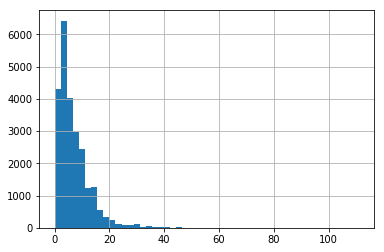

In [64]:
# Due to null values in age I will create a new feature (age_set)
# Exploration to determine number of classes for the age_set feature
data.age.hist(bins=50)
plt.show()

**Observation**

1. Concentration of age is below 20 and therefore we will adopt 2 classes(young, old and other for null values)

In [65]:
age_set = []

for i in range(data.shape[0]):
    x = data.age.iloc[i]

    if x <= 20:
        age_set.append('young')
    elif x > 20:
        age_set.append('old')
    else:
        age_set.append('other')


In [66]:
data.loc[:, 'age_set'] = age_set 

#### Label Encoding and One-Hot Encoding

status and age_set features need to be converted to what models will understand

In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [68]:
status_le = LabelEncoder()
ageset_le = OrdinalEncoder()
continent_oe = OneHotEncoder(drop='first', sparse=False)
category_oe = OneHotEncoder(drop='first', sparse=False)

status_transformed = status_le.fit_transform(data['status'])
ageset_transformed = ageset_le.fit_transform(data[['age_set']])
continent_transformed = continent_oe.fit_transform(data[['continent']])
category_transformed = category_oe.fit_transform(data[['category']])

In [69]:
continent_oe.get_feature_names()

/Users/Chinmay/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_AS', 'x0_EU', 'x0_NA', 'x0_SA', 'x0_UT'], dtype=object)

In [70]:
continent_ = pd.DataFrame(continent_transformed, columns=['AS', 'EU', 'NA', 'SA', 'UT'])
category_ = pd.DataFrame(category_transformed, columns=['BZ', 'HE', 'LE', 'OT', 'PC', 'TR'])

In [71]:
data.reset_index(inplace=True)

In [72]:
full_d = pd.concat([data, continent_, category_], axis=1)

In [73]:
full_d = full_d.assign(status = status_transformed, age_set= ageset_transformed)

In [74]:
full_d.drop(['age', 'category', 'continent', 'index'], axis=1, inplace=True)

#### Scaling

Scaling will be done to: funding_total_usd because it has extremely large values	

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
funding_scaler = StandardScaler()

funding_transformed = funding_scaler.fit_transform(full_d[['funding_total_usd']])

In [77]:
full_d = full_d.assign(funding_total_usd = funding_transformed)

**Observation**

1. The process above is not necessary to be repeated. Therefore, a copy of the transformed data will be saved in s3 bucckets after splitting into train and test data

### Train Test Splitting

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(full_d.drop(['status', 'invested_companies', 'investment_rounds', 'AS', 'EU', 'NA', 'SA', 'UT', 'BZ', 'HE', 'LE', 'OT', 'PC',
       'TR'], axis=1), full_d['status'], test_size=.3, random_state=42)

In [115]:
full_d['status'].value_counts().sum()

31679

In [80]:
# import os

# Saving Train Data to Buckets
pd.concat([y_train, X_train], axis=1).to_csv('./train.csv', index=False)

#s3 = boto3.resource('s3')
#s3.Object(bucket_name, os.path.join(prefix, 'train/train.csv')).upload_file('./train.csv')
# s3_input_train = sagemaker.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name,prefix), content_type='csv')

In [81]:
# Saving Test Data to Buckets
pd.concat([y_test, X_test], axis=1).to_csv('./test.csv', index=False)

#s3.Object(bucket_name, os.path.join(prefix, 'test/test.csv')).upload_file('./test.csv')
#s3_input_test = sagemaker.TrainingInput(s3_data='s3://{}/{}/test'.format(bucket_name,prefix), content_type='csv')

In [82]:
X_train.head()

,funding_rounds,funding_total_usd,milestones,relationships,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture,closed,dev,operating,age_set
30722,2,-0.181354,2,14,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
6664,1,-0.201343,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
29197,1,-0.110350,0,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
28678,1,-0.204481,0,10,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0
30779,1,-0.204481,1,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [83]:
X_train['operating'].value_counts()

1.0     19694
0.0      1365
2.0       467
3.0       256
4.0       157
5.0        87
6.0        54
7.0        27
8.0        19
9.0        11
11.0       10
10.0        6
12.0        6
17.0        3
15.0        3
22.0        1
16.0        1
30.0        1
38.0        1
37.0        1
14.0        1
19.0        1
13.0        1
63.0        1
25.0        1
Name: operating, dtype: int64

## SMOTE Over Sampling

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
clf = RandomForestClassifier(n_estimators = 500, max_depth=10, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8925715488215489

In [88]:
clf = RandomForestClassifier(n_estimators = 500, max_depth=10, random_state=0, class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=500,
                       random_state=0)

In [89]:
clf.feature_importances_

array([1.89872873e-02, 1.50152084e-01, 4.75108133e-02, 9.39874210e-02,
       2.84278724e-02, 4.14860287e-05, 9.58319459e-03, 3.12933071e-02,
       2.89015983e-02, 2.08042165e-02, 1.78138067e-02, 1.83441517e-02,
       1.99222030e-02, 2.27899246e-01, 5.86315346e-03, 2.40626415e-01,
       3.98417440e-02])

In [90]:
clf.score(X_test, y_test)

0.6695075757575758

In [91]:
y_train.value_counts()

3    18534
0     1799
1     1488
2      354
Name: status, dtype: int64

## MLP

In [92]:
from sklearn.neural_network import MLPClassifier

In [93]:
clf = MLPClassifier(random_state=0, max_iter=500).fit(X_train, y_train)

In [94]:
clf.score(X_test, y_test)

0.8913089225589226

In [95]:
clf = MLPClassifier(random_state=0, max_iter=500).fit(X_resampled, y_resampled)

In [96]:
clf.score(X_test, y_test)

0.65625

In [97]:
clf.n_layers_

3

## XGBoost

In [98]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
cross_val_score(XGBClassifier(), X_train, y_train).mean()

0.889334836527621

In [99]:
cross_val_score(XGBClassifier(), X_resampled, y_resampled).mean()

0.8647627818431183

In [100]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_model.score(X_test, y_test)

# print(confusion_matrix(y, y_pred))

0.8910984848484849

In [101]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)

xgb_model.score(X_test, y_test)

# print(confusion_matrix(y, y_pred))

0.7771464646464646

In [102]:
full_d.drop(['invested_companies', 'investment_rounds', 'AS', 'EU', 'NA', 'SA', 'UT', 'BZ', 'HE', 'LE', 'OT', 'PC',
       'TR'], axis=1)[full_d['status'] == 'ipo']

,status,funding_rounds,funding_total_usd,milestones,relationships,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture,closed,dev,operating,age_set


In [103]:
sample_pred = [[8, 4000.0, 4, 32, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 4, "young"]]
sample_pred_df = pd.DataFrame(sample_pred, columns =['funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'angel', 'crowdfunding', 'other', 'post-ipo', 'private-equity',
       'series-a', 'series-b', 'series-c+', 'venture', 'closed', 'dev',
       'operating', 'age_set'])
sample_pred_df

,funding_rounds,funding_total_usd,milestones,relationships,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture,closed,dev,operating,age_set
0,8,4000.0,4,32,0,0,0,0,0,0,0,1,0,2,2,4,young


In [104]:
# age_set = []

# for i in range(sample_pred_df.shape[0]):
#     x = sample_pred_df.age.iloc[i]

#     if x <= 20:
#         age_set.append('young')
#     elif x > 20:
#         age_set.append('old')
#     else:
#         age_set.append('other')

sample_pred = [[8, 4000.0, 4, 32, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 4, "young"]]
sample_pred_df = pd.DataFrame(sample_pred, columns =['funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'angel', 'crowdfunding', 'other', 'post-ipo', 'private-equity',
       'series-a', 'series-b', 'series-c+', 'venture', 'closed', 'dev',
       'operating', 'age_set'])
sample_pred_df

sample_pred_df[['age_set']] = ageset_le.transform(sample_pred_df[['age_set']])
test = np.array(sample_pred_df['funding_total_usd']).reshape(-1,1)
print(funding_scaler.transform(sample_pred_df[['funding_total_usd']]))
sample_pred_df[['funding_total_usd']] = funding_scaler.transform(sample_pred_df[['funding_total_usd']])
sample_pred_df

[[-0.20441786]]


,funding_rounds,funding_total_usd,milestones,relationships,angel,crowdfunding,other,post-ipo,private-equity,series-a,series-b,series-c+,venture,closed,dev,operating,age_set
0,8,-0.204418,4,32,0,0,0,0,0,0,0,1,0,2,2,4,2.0


In [105]:
from joblib import dump, load
dump(ageset_le, 'ageset_le.joblib') 
dump(funding_scaler, 'funding_scaler.joblib') 
dump(status_le, 'status_le.joblib')

NameError: name 'dump' is not defined

In [117]:
import xgboost

In [118]:
xgb_model.predict(sample_pred_df)[0]

3

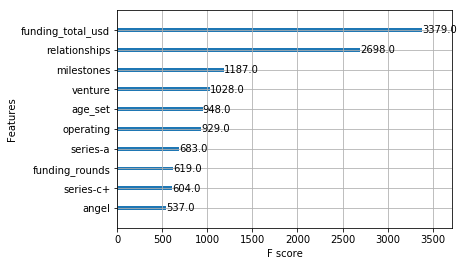

In [121]:
xgboost.plot_importance(xgb_model, max_num_features=10).get_figure().gca().set_title("")

plt.savefig('feature_plot.pdf', bbox_inches='tight')  

## Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/Users/Chinmay/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8892045454545454

In [124]:
clf = LogisticRegression(random_state=0).fit(X_resampled, y_resampled)
clf.score(X_test, y_test)

/Users/Chinmay/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6813973063973064

## Save model

In [106]:
from joblib import dump, load

In [107]:
dump(xgb_model, 'xgb_balanced.joblib') 

['xgb_balanced.joblib']